### Method: KNN, Task: Classification, Dataset: Iris

In [1]:
%matplotlib inline
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = datasets.load_iris()

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Iris dataset to pandas df
irisDF = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])

In [12]:
# Split dataset into training and test subsets
msk = np.random.rand(len(irisDF)) < 0.8
trainIris = irisDF[msk]
testIris = irisDF[~msk]

In [13]:
columnNames =  trainIris.columns.tolist()
# The columns that we will be making predictions with: iris['data']
print columnNames[:-1]
# The column that we want to predict: iris['target']
print columnNames[-1]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
species


In [14]:
# Using default KNN Classifier
from sklearn.neighbors import *
nnClassifier = KNeighborsClassifier()

In [15]:
# Fitting the classifier with the training data
knn = nnClassifier.fit(trainIris[columnNames[:-1]],trainIris[columnNames[-1]])
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [16]:
# Get the predictions for the test data
predictions = knn.predict(testIris[columnNames[:-1]])
type(predictions)

numpy.ndarray

In [17]:
# score computes the percent of samples that are correctly classified
scorePredictions = knn.score(testIris[columnNames[:-1]], testIris[columnNames[-1]])
print(scorePredictions*100)

100.0


In [18]:
# Explaining the samples misclassified
numErrors = 0
actual = testIris[columnNames[-1]].values
for i in range(len(predictions)):
    if predictions[i] != actual[i]:
        numErrors += 1
print "1 - Number of errors ", numErrors, " over ", len(predictions), " = ", 1- numErrors/float(len(predictions)) 

1 - Number of errors  0  over  29  =  1.0


### Classification metrics

In [23]:
# Examples correctly classified
from sklearn.metrics import accuracy_score
print accuracy_score(actual, predictions)
print accuracy_score(actual, predictions, normalize=False)

1.0
29


In [24]:
# >.8 consider good
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(actual, predictions)

1.0

In [25]:
# Get the confusion matrix to explore misclassified examples
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual,predictions, labels=[0, 1, 2])

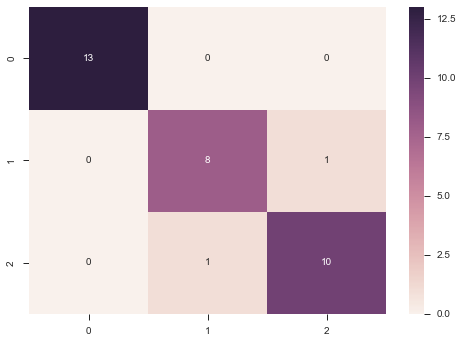

In [28]:
# Visualize the confusion matrix.
cmDF = pd.DataFrame(cm, index = [0,1,2],
                  columns = [0,1,2])
sns.heatmap(cmDF, annot=True)